## Exploring Financial Data with Visualizations: Indian Realty Stocks (Part 1)

In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
# For Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# For time stamps
from datetime import datetime

In [4]:
stock_names = ['dlf', 'godrej', 'indiabulls', 'prestige', 'oberoi']

In [5]:
dlf = pd.read_csv('DLF_data.csv', index_col='Date', parse_dates=True)
dlf = dlf.loc['2014-01-01':'2016-12-31']

godrej = pd.read_csv('GODREJPROP_data.csv', index_col='Date', parse_dates=True)
godrej = godrej.loc['2014-01-01':'2016-12-31']

indiabulls = pd.read_csv('IBREALEST_data.csv', index_col='Date', parse_dates=True)
indiabulls = indiabulls.loc['2014-01-01':'2016-12-31']

prestige = pd.read_csv('PRESTIGE_data.csv', index_col='Date', parse_dates=True)
prestige = prestige.loc['2014-01-01':'2016-12-31']

oberoi = pd.read_csv('OBEROIRLTY_data.csv', index_col='Date', parse_dates=True)
oberoi = oberoi.loc['2014-01-01':'2016-12-31']

In [6]:
realty_stocks = pd.concat([dlf['adj_close'], godrej['adj_close'], indiabulls['adj_close'], prestige['adj_close'], oberoi['adj_close']], axis=1)

In [7]:
realty_stocks.columns = stock_names

In [8]:
realty_stocks.head()

,dlf,godrej,indiabulls,prestige,oberoi
Date,,,,,
2014-01-01,161.338608,177.654449,71.803886,157.260239,231.021301
2014-01-02,157.876633,164.170441,67.325378,152.482925,229.612076
2014-01-03,160.200439,164.760956,67.079308,152.970398,228.785950
2014-01-06,158.208603,165.253082,66.341087,151.654236,230.146606
2014-01-07,155.505386,164.367279,65.504440,149.021851,225.238510


In [9]:
realty_stocks.isnull().sum()

dlf            2
godrej         8
indiabulls     2
prestige       2
oberoi        11
dtype: int64

In [10]:
dlf.head()

,open,high,low,close,adj_close,volume
Date,,,,,,
2014-01-01,167.600006,170.699997,166.649994,170.100006,161.338608,4944090.0
2014-01-02,170.350006,174.649994,165.300003,166.449997,157.876633,9278583.0
2014-01-03,165.000000,169.750000,163.350006,168.899994,160.200439,7211775.0
2014-01-06,169.000000,169.750000,165.100006,166.800003,158.208603,4924864.0
2014-01-07,166.199997,169.000000,162.199997,163.949997,155.505386,6468312.0


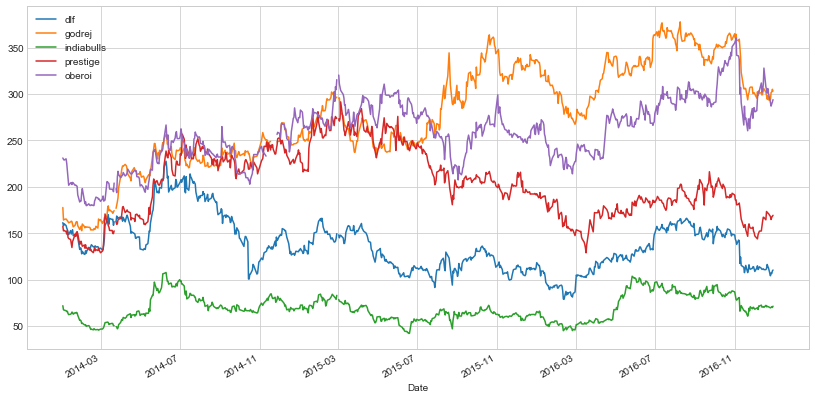

In [11]:
realty_stocks.plot(legend=True,figsize=(14,7))

In [12]:
#let's compute multiple moving averages, 15 day, 30 day and 60 day
m_avg_day = [15,30,60] 

for ma in m_avg_day:
    column_name = "MA for %s days" %(str(ma))
    
    dlf[column_name] = pd.rolling_mean(dlf['adj_close'],ma)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=15).mean()
  import sys
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=30).mean()
  import sys
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=60).mean()
  import sys


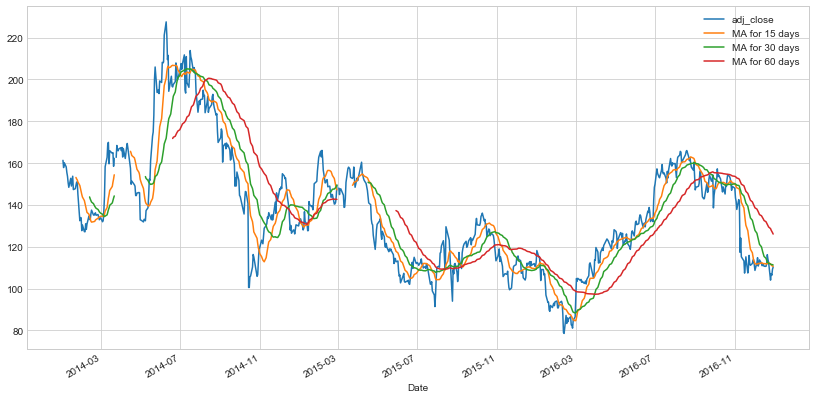

In [13]:
dlf[['adj_close','MA for 15 days','MA for 30 days','MA for 60 days']].plot(subplots=False,figsize=(14,7))

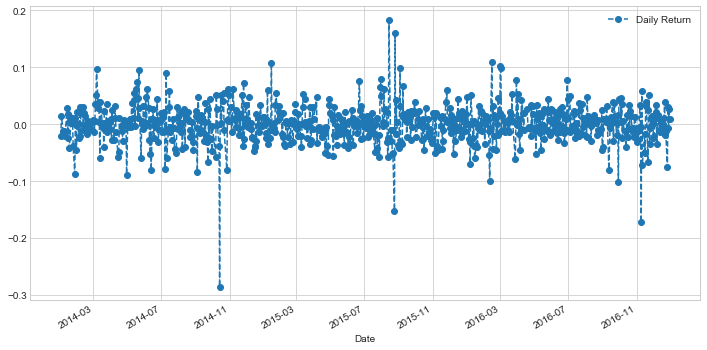

In [14]:
dlf['Daily Return'] = dlf['adj_close'].pct_change()

dlf['Daily Return'].plot(figsize=(12,6),legend=True,linestyle='--',marker='o')

In [15]:
godrej['Daily Return'] = godrej['adj_close'].pct_change()
indiabulls['Daily Return'] = indiabulls['adj_close'].pct_change()
prestige['Daily Return'] = prestige['adj_close'].pct_change()
oberoi['Daily Return'] = oberoi['adj_close'].pct_change()

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


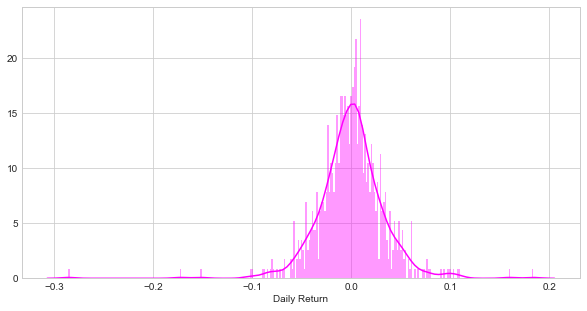

In [16]:
plt.figure(figsize=(10,5))
sns.distplot(dlf['Daily Return'].dropna(), bins=300,color='magenta')

In [17]:
realty_rets = realty_stocks.pct_change()

In [18]:
realty_rets.head()

,dlf,godrej,indiabulls,prestige,oberoi
Date,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN
2014-01-02,-0.021458,-0.075900,-0.062371,-0.030378,-0.006100
2014-01-03,0.014719,0.003597,-0.003655,0.003197,-0.003598
2014-01-06,-0.012433,0.002987,-0.011005,-0.008604,0.005947
2014-01-07,-0.017086,-0.005360,-0.012611,-0.017358,-0.021326


D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 720x720 with 0 Axes>

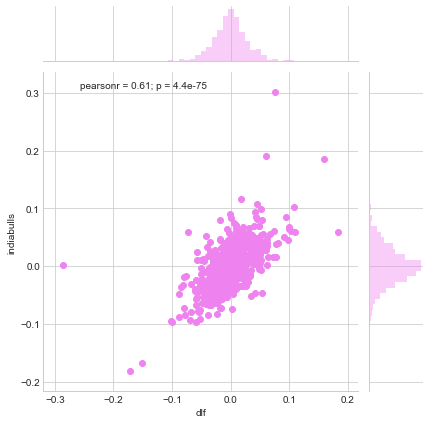

In [19]:
plt.figure(figsize=(10,10))
sns.jointplot('dlf','indiabulls',realty_rets,kind='scatter',color='violet')


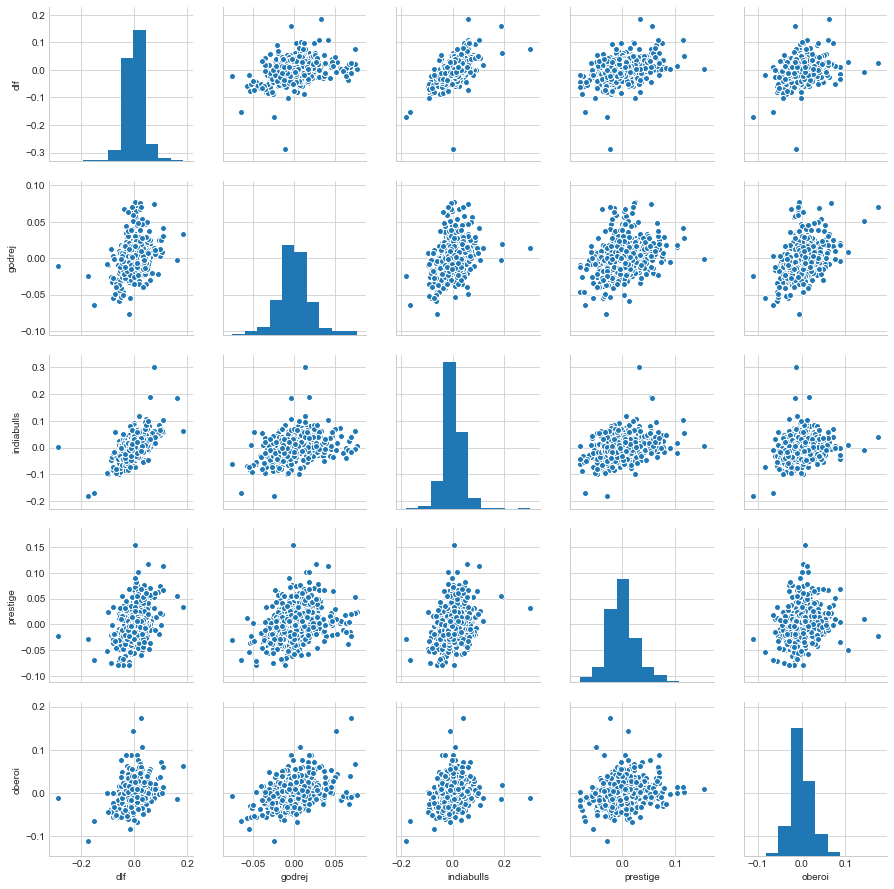

In [20]:
sns.pairplot(realty_rets.dropna())

D:\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


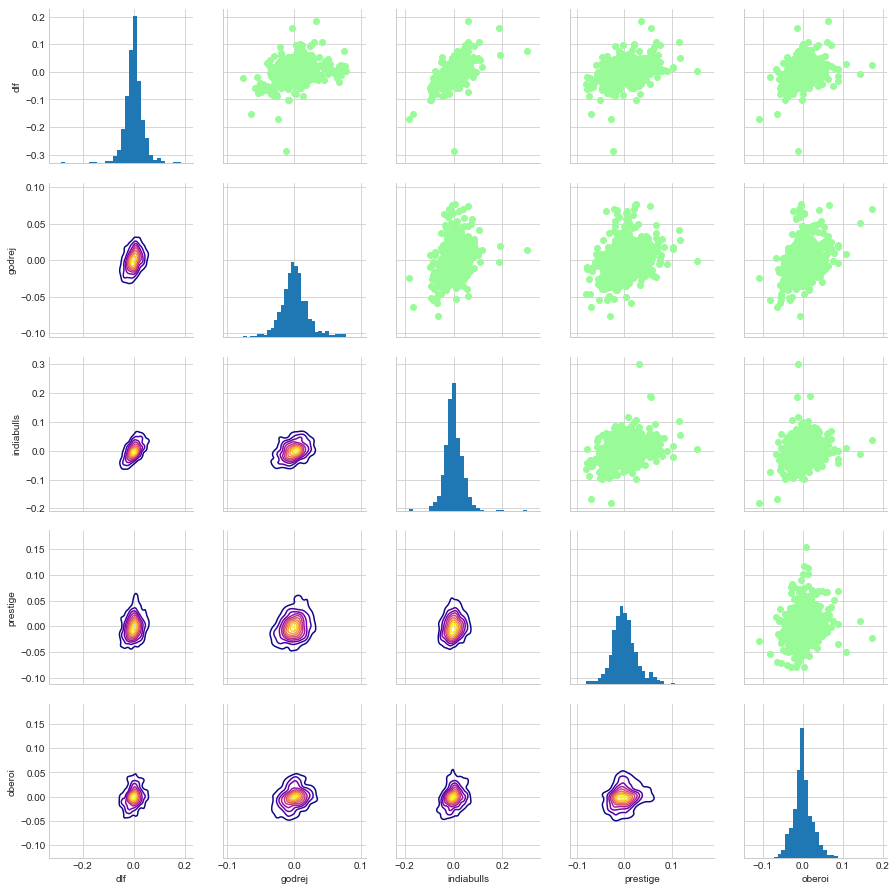

In [21]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(realty_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='palegreen')

# We can also define the lower triangle in the figure, including the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='plasma')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

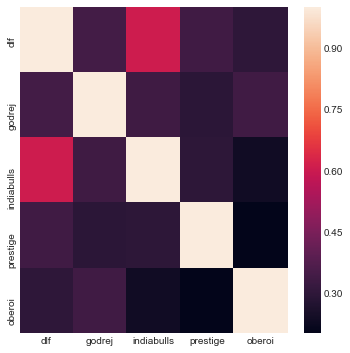

In [22]:
realty_corr = realty_rets.corr()

plt.figure(figsize=(6,6))
sns.heatmap(realty_corr)

In [23]:
#Risk Analysis

In [24]:
rets_clean = realty_rets.dropna()

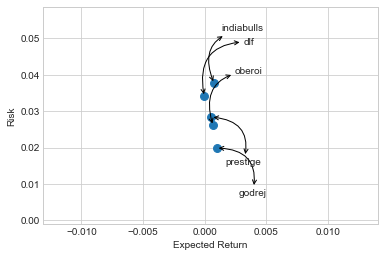

In [25]:
area = np.pi*20 #to see the circles on the plot

plt.scatter(rets_clean.mean(), rets_clean.std(), s=area)


plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y, i in zip(rets_clean.columns, rets_clean.mean(), rets_clean.std(), range(len(rets_clean.columns))):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50*(-1)**i),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '<->', connectionstyle = 'arc3,rad=0.6'))

#### Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.


Value at risk using the "bootstrap" method

For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile


D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


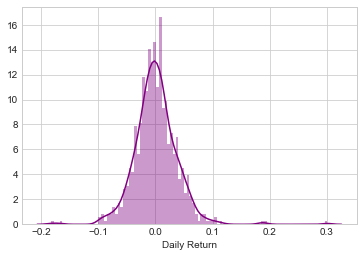

In [26]:
sns.distplot(indiabulls['Daily Return'].dropna(),bins=100,color='purple')

In [27]:
#for DLF
realty_rets['dlf'].quantile(0.01)

-0.08316776606840771

The 0.01 empirical quantile of daily returns is at -0.0831. That means that with 99% confidence, our worst daily loss will not exceed 8.31%. If we have a INR 10,000 investment, our one-day 1% VaR is 0.0831 * 10,000 = INR 831

In [28]:
#For Indiabulls
realty_rets['indiabulls'].quantile(0.01)

-0.08773777384391092

In [29]:
#For Oberoi
realty_rets['oberoi'].quantile(0.01)

-0.05598648748921109

In [30]:
#For Prestige
realty_rets['prestige'].quantile(0.01)

-0.06683120220063518

In [31]:
#For Godrej
realty_rets['godrej'].quantile(0.01)

-0.049777541078026524

### Value at Risk using the MCS

In [32]:
days = 365

dt = 1/days

mu = realty_rets.mean()['godrej']

sigma = realty_rets.std()['godrej']

In [33]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [34]:
godrej.loc['2014-01-01':'2014-12-31'].head()

,open,high,low,close,adj_close,volume,Daily Return
Date,,,,,,,
2014-01-01,166.899994,187.000000,166.800003,180.500000,177.654449,1679875.0,NaN
2014-01-02,182.000000,182.000000,165.800003,166.800003,164.170441,1314068.0,-0.075900
2014-01-03,167.899994,169.699997,165.300003,167.399994,164.760956,428777.0,0.003597
2014-01-06,168.000000,171.000000,166.000000,167.899994,165.253082,266548.0,0.002987
2014-01-07,168.899994,172.350006,166.149994,167.000000,164.367279,352029.0,-0.005360


In [35]:
godrej.loc['2014-01-01':'2014-12-31'].tail()

,open,high,low,close,adj_close,volume,Daily Return
Date,,,,,,,
2014-12-24,246.550003,250.500000,244.000000,248.250000,246.440918,146362.0,0.000403
2014-12-26,248.250000,250.250000,246.000000,248.350006,246.540192,45951.0,0.000403
2014-12-29,248.050003,253.699997,247.949997,250.050003,248.227814,88362.0,0.006845
2014-12-30,259.350006,269.200012,255.550003,257.299988,255.424957,374812.0,0.028994
2014-12-31,258.000000,260.799988,255.100006,257.549988,255.673141,140821.0,0.000972


Text(0.5,1,'Monte Carlo Analysis for DLF')

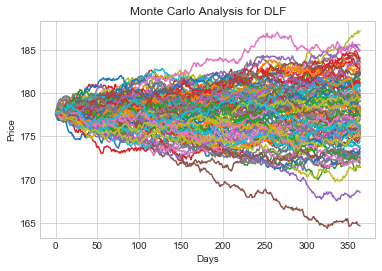

In [36]:
start_price = 177.654

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for DLF')

In [37]:
%%time
runs = 15000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

Wall time: 33.8 s


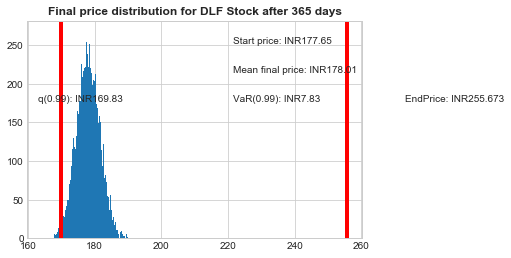

In [38]:
q = np.percentile(simulations,1)

plt.figure(figsize=(6,4))
plt.hist(simulations,bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: INR%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: INR%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): INR%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): INR%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Display 1% quantile
plt.figtext(1, 0.6, "EndPrice: INR255.673")

# Plot a line at the 1% quantile result
plt.axvline(x=255.673, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for DLF Stock after %s days" % days, weight='bold');

In [39]:
oberoi_dict = {}
oberoi_dict['days'] = 365

oberoi_dict['dt'] = 1/days

oberoi_dict['mu'] = realty_rets.mean()['oberoi']

oberoi_dict['sigma'] = realty_rets.std()['oberoi']

In [40]:
oberoi_dict

{'days': 365,
 'dt': 0.0027397260273972603,
 'mu': 0.0006660618079717283,
 'sigma': 0.026050286812922346}

In [41]:
oberoi.loc['2016-01-01':'2016-12-31'].head()

,open,high,low,close,adj_close,volume,Daily Return
Date,,,,,,,
2016-01-01,268.049988,275.000000,266.399994,272.250000,268.692169,79492.0,0.013589
2016-01-04,274.200012,274.200012,259.000000,260.000000,256.602264,162137.0,-0.044995
2016-01-05,260.000000,270.399994,260.000000,268.899994,265.385956,90098.0,0.034231
2016-01-06,267.399994,274.000000,265.350006,270.950012,267.409149,60704.0,0.007624
2016-01-07,265.049988,270.500000,256.000000,264.399994,260.944763,353290.0,-0.024174


Text(0.5,1,'Monte Carlo Analysis for Oberoi')

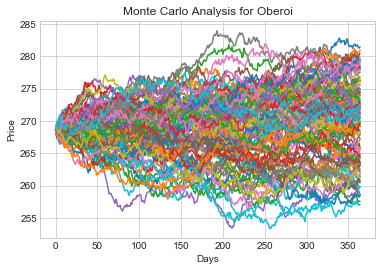

In [42]:
oberoi_dict['start_price'] = 268.692

for run in range(100):
    plt.plot(stock_monte_carlo(oberoi_dict['start_price'],oberoi_dict['days'],oberoi_dict['mu'],oberoi_dict['sigma']))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Oberoi')

In [43]:
%%time
runs = 15000

simulations_obe = np.zeros(runs)

for run in range(runs):
    simulations_obe[run] = stock_monte_carlo(oberoi_dict['start_price'],oberoi_dict['days'],
                                             oberoi_dict['mu'],oberoi_dict['sigma'])[days-1]

Wall time: 33.8 s


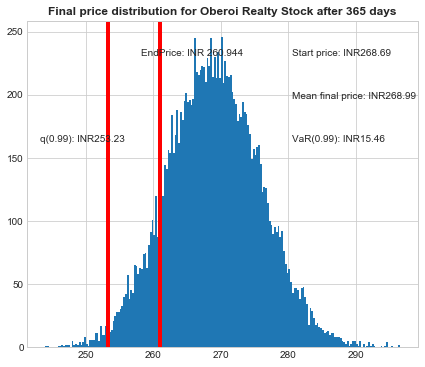

In [44]:
q = np.percentile(simulations_obe,1)

plt.figure(figsize=(7,6))
plt.hist(simulations_obe,bins=200)

# Starting Price
plt.figtext(0.65, 0.8, s="Start price: INR%.2f" %oberoi_dict['start_price'])
# Mean ending price
plt.figtext(0.65, 0.7, "Mean final price: INR%.2f" % simulations_obe.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.65, 0.6, "VaR(0.99): INR%.2f" % (oberoi_dict['start_price'] - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): INR%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Display 1% quantile
plt.figtext(0.35, 0.8, "EndPrice: INR 260.944")

# Plot a line at the 1% quantile result
plt.axvline(x=260.944, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Oberoi Realty Stock after %s days" %oberoi_dict['days'], weight='bold');

More to come in Part 2 of the post...